# Table of Contents

* [1 Initialization](#chapter1)
    * [1.1 Import Python packages](#section_1_1)
    * [1.2 Initialize model](#section_1_2)
    * [1.3 Modify settings](#section_1_3)
* [2 Preprocessing](#chapter2)
    * [2.1 2D model setup](#section_2_1)
        * [2.1.1 setup model topology](#section_2_1_1)
        * [2.1.2 setup manning friction](#section_2_1_2)
        * [2.1.3 setup infiltration](#section_2_1_3)
    * [2.2 1D model setup](#section_2_2)
    * [2.3 1D-2 model-coupling](#section_2_3)
    * [2.4 Boundary conditions](#section_2_4)
        * [2.4.1 rainfall conditions](#section_2_4_1)
        * [2.4.2 flow conditions](#section_2_4_2)
    * [2.5 Initial conditions](#section_2_5)
    * [2.6 Model cases](#section_2_6)
* [3 Running models](#chapter3)
    * [3.1 Grid-generator](#section_3_1)
        * [3.1.3 Process geopackage](#section_3_1_3)    
    * [3.2 Flow-computator](#section_3_2)
* [4 Postprocessing](#chapter4)
    * [4.1 Read 2D network](#section_4_1)
        * [4.1.1 Point timeseries](#section_4_1_1)
        * [4.1.2 Discharge cross-section](#section_4_1_2)
        * [4.1.3 Get waterlevel profile](#section_4_1_3)

# 1 Initialization <a class="anchor" id="chapter1"></a>

## 1.1 Import Python packages <a class="anchor" id="section_1_1"></a>

In [1]:
from pathlib import Path
import geopandas as gpd
from shapely.geometry import LineString, Point

## 1.2 Initialize model <a class="anchor" id="section_1_2"></a>

Here we "initalize" defining at least a:
- project_name
- project_path

should output
- directory structure (Vidura and Roop)
- metadata.json in that directory structure (Jackie and Daniel)
- default model settings-files in that directory structure; especially numeric settings

In [2]:
project_dir = Path(r"../data/de_tol_small")
case_name = "case1"
case_dir = project_dir / case_name
crs = 28992

## 1.3 Modify settings <a class="anchor" id="section_1_3"></a>

Here modeller can customize default model settings for his/her project

# 2 Preprocessing <a class="anchor" id="chapter2"></a>

Here we follow the user-requirement-documentation chapter 5. We:
1. setup a 2D model: topology, manning and infiltration
2. setup a 1D model
3. couple the 1D to 2D model
4. provide boundary conditions: rainfall and flow
5. provide initial conditions
6. define cases from models (1 t/m 3) boundary conditions (5) and initial conditions (6)

## 2.1 2D model setup <a class="anchor" id="section_2_1"></a>

### 2.1.1 setup model topology <a class="anchor" id="section_2_1_1"></a>

### 2.1.2 setup manning friction <a class="anchor" id="section_2_1_2"></a>

### 2.1.3 setup infiltration <a class="anchor" id="section_2_1_3"></a>

## 2.2 1D model setup <a class="anchor" id="section_2_2"></a>

## 2.3 1D-2D model-coupling <a class="anchor" id="section_2_3"></a>

## 2.4 Boundary conditions <a class="anchor" id="section_2_4"></a>

### 2.4.1 rainfall conditions <a class="anchor" id="section_2_4_1"></a>

### 2.4.2 flow conditions <a class="anchor" id="section_2_4_2"></a>

## 2.5 Initial conditions <a class="anchor" id="section_2_5"></a>

## 2.6 Model cases <a class="anchor" id="section_2_6"></a>

# 3 Running models <a class="anchor" id="chapter3"></a>

Here we go trough the model-executing process by:
1. Generate grid(2) and inspect the result
2. Computate flow and inspect results at selected locations

## 3.1 Grid-generator <a class="anchor" id="section_3_1"></a>

### 3.1.3 Process geopackage <a class="anchor" id="section_3_1_3"></a>

In [3]:
from h2flow.postprocessing.grid import convert_grid_to_gpkg
case_grids_dir = case_dir / "grids"
convert_grid_to_gpkg(nodes_dia= case_grids_dir / "node_coordinates.dia",
                     links_dia= case_grids_dir / "link_coordinates.dia",
                     node_dem= case_grids_dir / "node_dem.dia",
                     ridges_file= case_dir / "ridges.  1",
                     epsg= crs,
                     output_path = case_grids_dir / "grid.gpkg",
                     overwrite = True)

## 3.2 Flow-computator <a class="anchor" id="section_3.2"></a>

# 4 Postprocessing <a class="anchor" id="chapter4"></a>

Here we need sections on postprocessing

### 4.1 Read 2D network <a class="anchor" id="section_4_1"></a>

In [4]:
from h2flow.postprocessing.results import extract_result, extract_distances, LINK_RESULTS, NODE_RESULTS

start_datetime = "2001-01-01T00:00:00Z"
line = LineString(((126752.926, 464172.307), (126795.741, 464128.306)))
point = Point(line.coords[0])

print("@LINKS:", LINK_RESULTS)
print("@NODES:", NODE_RESULTS)

@LINKS: ['discharges2d', 'velocities2d']
@NODES: ['thinwaterdepths2d', 'volumes2d', 'waterlevels2d', 'velocityupwind2d']


### 4.1.1 Point timeseries <a class="anchor" id="section_4_1_1"></a>

<AxesSubplot:xlabel='datetime'>

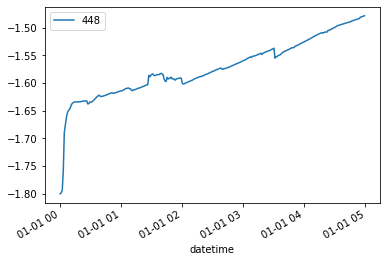

In [5]:
df = extract_result(case_dir, result="waterlevels2d", geometry=point, start_datetime=start_datetime)
df.plot()

### 4.1.2 Discharge cross-section <a class="anchor" id="section_4_1_2"></a>

<AxesSubplot:xlabel='datetime'>

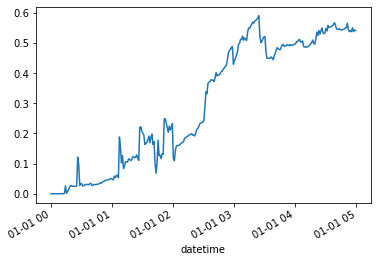

In [6]:
df = extract_result(case_dir, result="discharges2d", geometry=line, start_datetime=start_datetime)
df.sum(axis=1).plot()

### 4.1.3 Get waterlevel profile <a class="anchor" id="section_4_1_3"></a>

<AxesSubplot:xlabel='distance'>

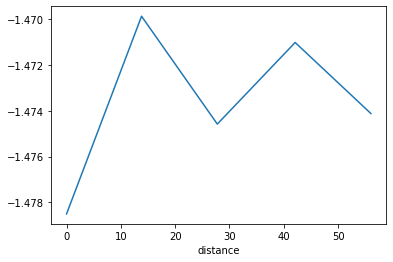

In [7]:
df = extract_distances(case_dir, geometry=line)
level_df = extract_result(case_dir, result="waterlevels2d", geometry=line, start_datetime=start_datetime)
level_max_series = level_df.max()
df["waterlevel"] = df["number"].apply(lambda x:level_max_series.loc[x])
df.set_index("distance")["waterlevel"].plot()

### 4.2 Export <a class="anchor" id="section_4_2"></a>

### 4.2.1 GTiffs <a class="anchor" id="section_4_2_1"></a>

In [8]:
from h2flow.postprocessing.subgrid_results import export_depth
export_depth(case_dir = case_dir,
             elevation_file = case_dir / "depthfile,imax=   642,jmax=   706.  1",
             export_dir = case_dir / "gtiffs",
             start_datetime=start_datetime,
             epsg=crs)

writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T000000.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T000004.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T000104.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T000204.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T000304.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T000404.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T000504.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T000604.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T000704.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T000804.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T000904.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T001004.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T001104.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T001204.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_

writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T020004.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T020104.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T020204.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T020304.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T020404.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T020504.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T020604.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T020704.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T020804.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T020904.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T021004.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T021104.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T021204.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T021304.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_

writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T040104.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T040204.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T040304.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T040404.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T040504.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T040604.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T040704.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T040804.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T040904.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T041004.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T041104.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T041204.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T041304.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_20010101T041404.tif
writing ..\data\de_tol_small\case1\gtiffs\depth_